# <font color=grey>  GKV Churn Analysis </font>

## <font color=grey> Import Libraries </font>

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from numpy import std
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

## <font color=grey> Load Data </font>

In [3]:
df = pd.read_csv('/project_data/data_asset/GKV_Stammdaten.csv')
df.head()

,ID,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,...,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Churn
0,1,34,M,0,0,1,single,8.0,Sueddeutschland,Thueringen,...,16.260385,26,ja,nein,nein,nein,ja,nein,nein,Kunde
1,2,52,M,0,0,0,NaN,8.0,Norddeutschland,Brandenburg,...,189.000000,1,nein,nein,nein,nein,ja,nein,nein,Kunde
2,3,76,F,1,0,0,single,3.0,Norddeutschland,Mecklenburg-Vorpommern,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,Abwanderer
3,4,81,M,1,0,0,single,NaN,Norddeutschland,Hamburg,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,Kunde
4,5,55,M,2,0,0,NaN,3.0,Sueddeutschland,Thueringen,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,Abwanderer


## <font color=grey> Exploratory Data Analysis </font>

In [5]:
df['Churn'].value_counts().to_frame()

,Churn
Kunde,431
Abwanderer,306


In [8]:
df = df.replace({'Abwanderer': 1})
df = df.replace({'Kunde': 0})
df.head(3)

,ID,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,...,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Churn
0,1,34,M,0,0,1,single,8.0,Sueddeutschland,Thueringen,...,16.260385,26,ja,nein,nein,nein,ja,nein,nein,0
1,2,52,M,0,0,0,NaN,8.0,Norddeutschland,Brandenburg,...,189.000000,1,nein,nein,nein,nein,ja,nein,nein,0
2,3,76,F,1,0,0,single,3.0,Norddeutschland,Mecklenburg-Vorpommern,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,1


In [9]:
df.describe()

,ID,Alter,Kinder,DMP,Zahnzusatz,DAUER_Kundenbeziehung,Total_Beitraege,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,Churn
count,737.000000,737.000000,737.000000,737.000000,737.000000,735.000000,737.000000,737.000000,737.000000,737.000000
mean,369.000000,57.533243,0.985075,0.609227,0.335142,8.572789,254.309688,99.087113,5.776119,0.415197
std,212.897863,22.308224,0.811631,0.488255,0.472361,2.381198,228.423905,114.172091,9.111929,0.493091
min,1.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,185.000000,39.000000,0.000000,0.000000,0.000000,8.000000,78.930000,20.447500,1.000000,0.000000
50%,369.000000,56.000000,1.000000,1.000000,0.000000,9.000000,189.000000,54.000000,1.000000,0.000000
75%,553.000000,77.000000,2.000000,1.000000,1.000000,11.000000,386.340000,149.000000,3.000000,1.000000
max,737.000000,97.000000,2.000000,1.000000,1.000000,11.000000,1101.080000,699.000000,45.000000,1.000000


## <font color=grey> Visualization</font>

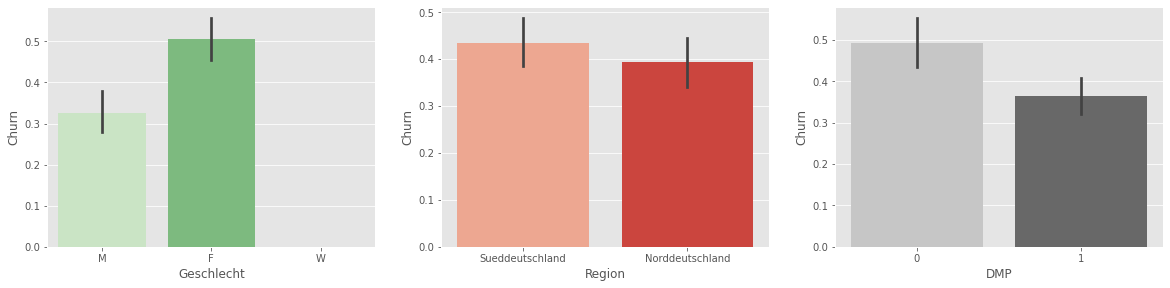

In [10]:
plt.figure(figsize=[20,15])

plt.subplot(331)
sns.barplot('Geschlecht', 'Churn', data = df, palette = "Greens")

plt.subplot(332)
sns.barplot('Region', 'Churn', data = df, palette = "Reds")

plt.subplot(333)
sns.barplot('DMP', 'Churn', data = df, palette = "Greys")

### <font color=black> Boxplot </font>

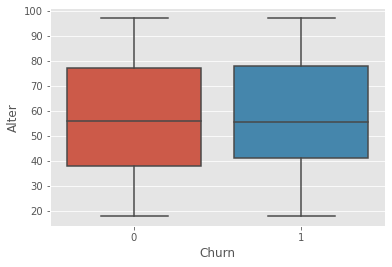

In [14]:
sns.boxplot(x="Churn", y="Alter", data=df)

### <font color=black> Korrelation </font>

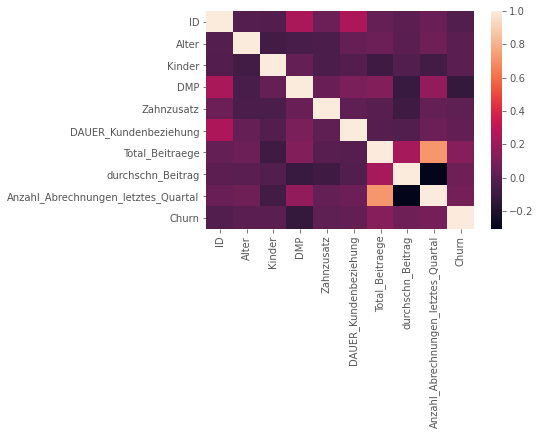

In [11]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## <font color=grey> Missing Values </font>

### <font color=black> Impute Missings </font>

In [12]:
#Familienstand
#Replace the missing by the most frequent 
df['Familienstand'].replace(np.nan, "999", inplace=True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=["DAUER_Kundenbeziehung"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [13]:
#Test: Are still missing values in the DF
df.isnull().values.any()

False

### <font color=Black> Encoding Categorial Data</font>

In [83]:
#implement a viable data encoding
def numencode(Inputdaten):
    CatDaten = Inputdaten.select_dtypes(include=['object'])
    columns=[]
    columns = CatDaten.columns.values
    for col in columns:
        col = str(col)
        Inputdaten[col]=pd.Categorical(Inputdaten[col])
        Inputdaten[col]=Inputdaten[col].cat.codes
df_encoded = df
numencode(df_encoded)

## <font color=grey> Modeling </font>

In [85]:
#transform data into vectors
Y = np.array(df_encoded['Churn'])
df_encoded = df_encoded.drop('Churn', 1)
df_x = df_encoded.drop('ID', 1)
X = np.array(df_x)

feature_mapping = {}
counter = 0
for x in df_x.columns:
    feature_mapping[counter]=x
    counter = counter + 1

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

## <font color=Black> Random Forest</font>

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [46]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [47]:
# Model Evaluation
model = rf
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.6789883268482491
Accuracy (test set): 0.669683257918552
AUC: 0.5909945317840055
Precision: 0.8571428571428571
Recall: 0.20454545454545456
F1 Score: 0.3302752293577982


## <font color=Black> Decision Tree</font>

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dTree = DecisionTreeClassifier(min_samples_leaf=50, criterion="entropy", max_depth = 5)
dTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

In [50]:
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

In [51]:
# Model Evaluation
model = dTree
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.6361867704280155
Accuracy (test set): 0.6153846153846154
AUC: 0.5670283663704717
Precision: 0.5272727272727272
Recall: 0.32954545454545453
F1 Score: 0.40559440559440557


## <font color=grey> Visualization Decision Tree</font>

In [52]:
!pip install graphviz

In [53]:
!pip install pydotplus

In [54]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

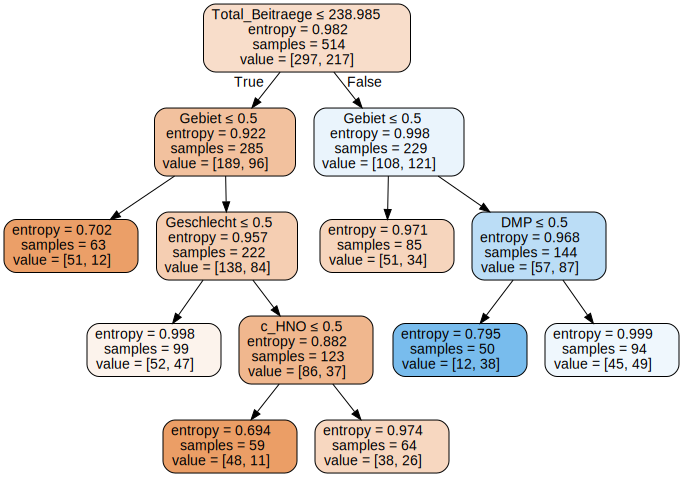

In [55]:
dot_data = tree.export_graphviz(dTree, out_file=None,
                                feature_names=df_encoded.columns[0:20], 
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

## XGBoost

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb= XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=5, learning_rate=0.02, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=600, nthread=1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1.0)
xgb.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_depth=5,
              min_child_weight=5, n_estimators=600, nthread=1, seed=0,
              silent=True, subsample=1.0)

In [58]:
# Modelevaluation
model = xgb
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.7587548638132295
Accuracy (test set): 0.6606334841628959
AUC: 0.6007775119617226
Precision: 0.6585365853658537
Recall: 0.3068181818181818
F1 Score: 0.4186046511627907


## Catboost

In [98]:
!pip install catboost

     |████████████████████████████████| 67.3 MB 3.5 MB/s eta 0:00:011   |███▉                            | 8.1 MB 4.4 MB/s eta 0:00:14     |██████▍                         | 13.5 MB 8.4 MB/s eta 0:00:07


In [113]:
import numpy as np
from catboost import CatBoostClassifier, Pool

# initialize data
cat = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
cat.fit(X_train, Y_train)

0:	learn: 0.6547784	total: 641us	remaining: 641us
1:	learn: 0.6432860	total: 1.81ms	remaining: 0us


In [114]:
# Modelevaluation
model = cat
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.6575875486381323
Accuracy (test set): 0.6380090497737556
AUC: 0.5915926179084074
Precision: 0.5714285714285714
Recall: 0.36363636363636365
F1 Score: 0.4444444444444444


## <font color=grey> Model Comparison </font>

In [115]:
# Model Evaluation AUC
print ('AUC')
print ('Random Forrest:', roc_auc_score(Y_test, rf.predict(X_test)))
print ('Decision Tree:', roc_auc_score(Y_test, dTree.predict(X_test)))
print ('XGBoost:', roc_auc_score(Y_test, xgb.predict(X_test)))
print ('CatBoost:', roc_auc_score(Y_test, cat.predict(X_test)))

AUC
Random Forrest: 0.5909945317840055
Decision Tree: 0.5670283663704717
XGBoost: 0.6007775119617226
CatBoost: 0.5915926179084074


## <font color=grey> Scoring New Data </font>

In [67]:
df1 = pd.read_csv('/project_data/data_asset/GKV_Daten_Neu.csv')
df1.head()

,ID,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,...,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Beschwerden_letztes Jahr,Beschwerdekanal
0,1,95,M,2,1,0,NaN,3.0,Sueddeutschland,Saarland,...,16,ja,nein,nein,nein,ja,ja,nein,0,NaN
1,2,67,M,2,1,0,verheiratet,11.0,Norddeutschland,Nordrhein-Westfalen,...,16,ja,nein,nein,nein,ja,ja,nein,0,NaN
2,3,82,F,1,1,0,verheiratet,9.0,Norddeutschland,Nordrhein-Westfalen,...,16,ja,nein,nein,nein,ja,ja,nein,1,Call Center
3,4,58,F,1,1,0,NaN,8.0,Norddeutschland,Nordrhein-Westfalen,...,3,ja,nein,nein,nein,nein,ja,nein,0,NaN
4,5,49,M,1,1,0,single,11.0,Sueddeutschland,Bayern,...,0,nein,nein,nein,nein,nein,nein,nein,1,Brief


In [68]:
#Dataprep
df1 = df1.drop(['ID'], axis =1)

#implement a viable data encoding
def numencode(Inputdaten):
    CatDaten = Inputdaten.select_dtypes(include=['object'])
    columns=[]
    columns = CatDaten.columns.values
    for col in columns:
        col = str(col)
        Inputdaten[col]=pd.Categorical(Inputdaten[col])
        Inputdaten[col]=Inputdaten[col].cat.codes
dfnew = df1
numencode(dfnew)

In [72]:
X1 = np.array(dfnew[['Alter', 'Geschlecht', 'Kinder', 'DMP', 'Zahnzusatz', 'Familienstand',
       'DAUER_Kundenbeziehung', 'Region', 'Bundesland', 'Gebiet',
       'Total_Beitraege', 'durchschn_Beitrag',
       'Anzahl_Abrechnungen_letztes_Quartal', 'c_Allgemeinmediziner',
       'c_Orthopaede', 'c_Zahn', 'c_Radiologe', 'c_HNO', 'c_Chirugie',
       'c_stationaer']])

In [73]:
predict = xgb.predict(X1)

In [74]:
proba = xgb.predict_proba(X1)[:,1]

In [75]:
df1['Prediction'] = predict
df1['Probability'] = proba
df1.head()

,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,Gebiet,...,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Beschwerden_letztes Jahr,Beschwerdekanal,Prediction,Probability
0,95,1,2,1,0,-1,3.0,1,11,0,...,1,1,1,0,0,1,0,-1,0,0.337565
1,67,1,2,1,0,1,11.0,0,9,1,...,1,1,1,0,0,1,0,-1,0,0.447944
2,82,0,1,1,0,1,9.0,0,9,1,...,1,1,1,0,0,1,1,1,1,0.629861
3,58,0,1,1,0,-1,8.0,0,9,1,...,1,1,1,1,0,1,0,-1,0,0.463656
4,49,1,1,1,0,0,11.0,1,1,1,...,1,1,1,1,1,1,1,0,0,0.352625


## <font color=grey> Deployment </font>

In [76]:
!pip install -U ibm-watson-machine-learning | tail -n 1

In [89]:
# @hidden_cell
username = 'ari'
password = 'Enigma'

wml_credentials = {
    "username": username,
    "password": password,
    "url": url,
    "instance_id": 'openshift',
    "version": '3.5'
}

from ibm_watson_machine_learning import APIClient
client = APIClient(wml_credentials)

In [79]:
# get the Project ID and set the location to save the model to the project
import os
project_id = os.environ['PROJECT_ID']
client.set.default_project(project_id)

'SUCCESS'

In [80]:
# Test
client.data_assets.list()

------------------------  ----------  -----  ------------------------------------
NAME                      ASSET_TYPE  SIZE   ASSET_ID
GKV_ CRM_Beschwerden.csv  data_asset  8230   43447916-c89b-4ced-a445-d1892576d14e
GKV_Stammdaten.csv        data_asset  82315  7553623f-513a-46b3-bb65-ea4329192d34
Retail                    data_asset  0      8b3750bb-8621-4c58-9cb5-68f3217cfbe9
GKV_Daten_Neu.csv         data_asset  10987  fa1bab42-5b59-4b68-9910-881531819ae7
------------------------  ----------  -----  ------------------------------------


In [81]:
#Supported ML Libraries
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
tensorflow_1.15-py3.6          2b73a275-7cbf-420b-a912-eae7f436e0bc  base
pytorch_1.2-py3.6              2c8ef57d-2687-4b7d-acce-01f94976dac1  base
spark-mllib_2.3                2e51f70

In [87]:
sofware_spec_uid = client.software_specifications.get_id_by_name("default_py3.7")

metadata = {
            client.repository.ModelMetaNames.NAME: 'Decision Tree',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=dTree,
    meta_props=metadata,
    training_data=df_x,
    training_target=df['Churn'])

In [88]:
#get all models
models_details = client.repository.list_models()

------------------------------------  -------------  ------------------------  -----------------
ID                                    NAME           CREATED                   TYPE
112c93a4-dfc0-4c4c-91b3-1c72970e6ca1  Decision Tree  2021-04-08T18:40:39.002Z  scikit-learn_0.23
------------------------------------  -------------  ------------------------  -----------------


## <font color=grey> Prepare Scoring Payload </font>

In [90]:
# Select one customer (as Numpy Array)
input = X_test[0]
input

array([ 61.,   0.,   1.,   0.,   1.,   2.,  10.,   1.,  15.,   1., 179.,
       179.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,   1.])

In [92]:
# Predict Credit Default
dTree.predict(input.reshape(-1, 20))

array([0])

In [93]:
# Predict Credit Default
dTree.predict_proba(input.reshape(-1, 20))[:,1]

array([0.47474747])

In [94]:
import json
scoring_values = input.tolist()
scoring_payload = {"input_data": [{"values": [scoring_values]}]}
print(json.dumps(scoring_payload))

{"input_data": [{"values": [[61.0, 0.0, 1.0, 0.0, 1.0, 2.0, 10.0, 1.0, 15.0, 1.0, 179.0, 179.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]]}]}
